<a href="https://colab.research.google.com/github/Max-Wind0/Frequent_set_and_Association_rules/blob/main/Frequent_set_and_Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Разработайте программу, которая выполняет поиск частых наборов объектов в заданном наборе данных с помощью алгоритма Apriori. Список результирующих наборов должен содержать как наборы, так и значение поддержки для каждого набора. Параметрами программы являются набор, порог поддержки и способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

\
2. Проведите эксперименты на наборе данных baskets.csv (сведения о покупках в супермаркете). В экспериментах варьируйте пороговое значение поддержки (например: 1%, 3%, 5%, 10%, 15%).

\
3. Выполните визуализацию результатов экспериментов в виде следующих диаграмм:
*   сравнение быстродействия на фиксированном наборе данных при изменяемом пороге поддержки;
*   количество частых наборов объектов различной длины на фиксированном наборе данных при изменяемом пороге поддержки.

\
4. Подготовте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
* формулировка задания;
* гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами;
* рисунки с результатами визуализации;
* пояснения, раскрывающие смысл полученных результатов.

Импорт необходимых библиотек для выполнения поставленных задач

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import time
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


Данные загружаются из CSV-файла baskets.csv, который должен быть в виде списка покупок для каждого клиента. Это список покупок, где каждая строка — это список товаров, приобретённых одним покупателем.

In [ ]:
# Чтение данных из CSV файла
file_path = "/content/drive/MyDrive/ДАТАСЕТЫ/baskets utf-8.csv"
data = pd.read_csv(file_path, header=None, encoding='utf-8')

transactions = []
for i in range(len(data)):
    transaction = [item for item in data.iloc[i] if pd.notna(item)]
    transactions.append(transaction)

 С помощью класса TransactionEncoder преобразуем данные в бинарный формат, где строки соответствуют транзакциям, а столбцы — это товары. Если товар присутствует в транзакции, то его значение в таблице будет равно True, иначе False.

In [ ]:
# Преобразуем данные в бинарный формат
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

Для каждой пороговой поддержки алгоритм Apriori извлекает частые наборы объектов. Мы также сохраняем время выполнения и длину частых наборов для дальнейшей визуализации.

In [ ]:
support_thresholds = [1, 3, 5, 10, 15]
execution_times = []
results = []
sort_method = 'support'
for threshold in support_thresholds:
    start_time = time.time()
    frequent_itemsets = apriori(df, min_support=threshold/100, use_colnames=True)
    execution_time = time.time() - start_time

    if sort_method == 'support':
        frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)
    elif sort_method == 'lexicographic':
        frequent_itemsets = frequent_itemsets.sort_values(by='itemsets', ascending=True)

    execution_times.append(execution_time)
    results.append(frequent_itemsets)

itemset_counts = []
for res in results:
    counts = res['itemsets'].apply(lambda x: len(x)).value_counts().sort_index()
    itemset_counts.append(counts)

Мы строим два графика:
* График времени выполнения в зависимости от порога поддержки.
* График количества частых наборов объектов по длине (сколько наборов объектов разной длины найдено для каждого порога).

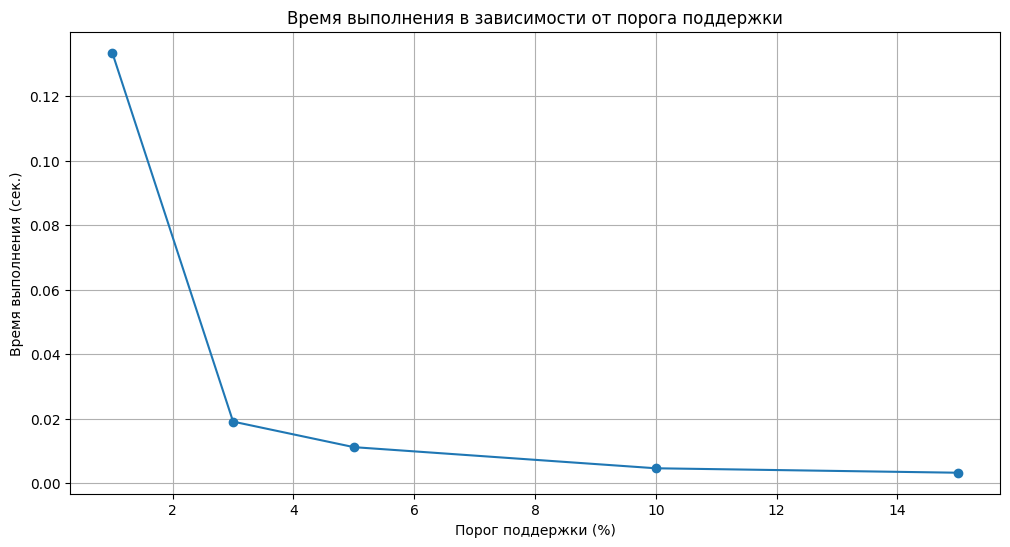

In [ ]:
# Сравнение времени выполнения
plt.figure(figsize=(12, 6))
plt.plot(support_thresholds, execution_times, marker='o')
plt.title("Время выполнения в зависимости от порога поддержки")
plt.xlabel("Порог поддержки (%)")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)
plt.show()

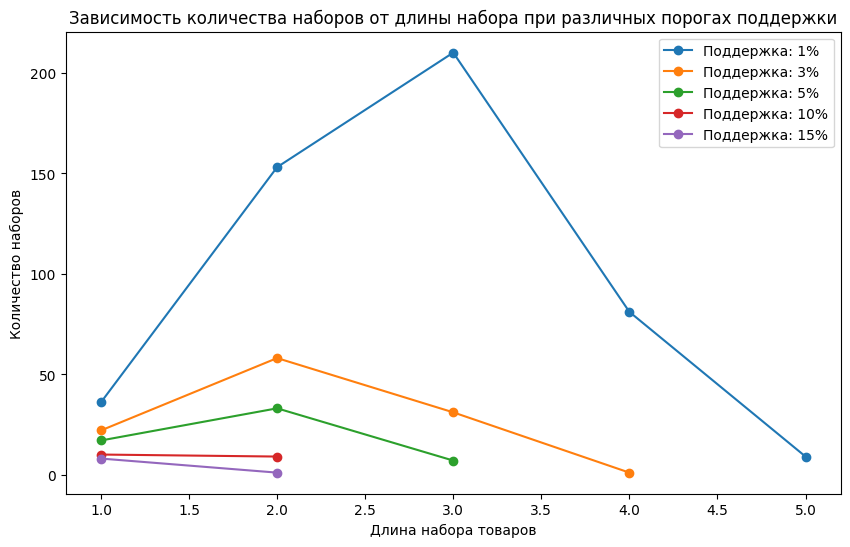

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for i, counts in enumerate(itemset_counts):
    ax.plot(counts.index, counts.values, label=f'Поддержка: {support_thresholds[i]}%', marker='o')

ax.set_xlabel('Длина набора товаров')
ax.set_ylabel('Количество наборов')
ax.set_title('Зависимость количества наборов от длины набора при различных порогах поддержки')
ax.legend()
plt.show()

1. Доработайте программу из задания Поиск частых наборов, чтобы она также выполняла поиск ассоциативных правил. Список результирующих правил должен выдаваться в удобочитаемом виде (антецедент→консеквент) с указанием поддержки и достоверности каждого правила. Дополнительные параметры программы: порог достоверности, способ упорядочивания результирующего списка наборов (по убыванию значения поддержки или лексикографическое).

\
2. Проведите эксперименты на наборах из задания 1. В экспериментах Зафиксируйте значение пороговое значение поддержки (например, 10%), варьируйте пороговое значение достоверности (например, от 70% до 95% с шагом 5%).

\
3. Выполните визуализацию полученных результатов в виде следующих диаграмм:
* сравнение быстродействия поиска правил на фиксированном наборе данных при изменяемом пороге достоверности;
* общее количество найденных правил на фиксированном наборе данных при изменяемом пороге достоверности.

\
4. Подготовьте список правил, в которых антецедент и консеквент суммарно включают в себя не более семи объектов (разумное количество). Проанализируйте и изложите содержательный смысл полученного результата.

\
5. Подготовьте отчет о выполнении задания и загрузите отчет в формате PDF в систему. Отчет должен представлять собой связный и структурированный документ со следующими разделами:  
* формулировка задания;
* гиперссылка на каталог репозитория с исходными текстами, наборами данных и др. сопутствующими материалами;
* рисунки с результатами визуализации;
* пояснения, раскрывающие смысл полученных результатов.

In [ ]:
# Параметры
support_threshold = 1  # Например, порог поддержки 1%
confidence_thresholds = [65, 70, 75, 80, 85, 90, 95]  # Пороги достоверности
sort_method = 'support'  # Метод сортировки: 'support' или 'lexicographic'

execution_times = []
rule_counts = []
rules_by_confidence = []

# Процесс поиска правил для различных порогов достоверности
for confidence in confidence_thresholds:
    start_time = time.time()

    # Находим частые наборы товаров
    frequent_itemsets = apriori(df, min_support=support_threshold / 100, use_colnames=True)

    # Ищем ассоциативные правила на основе частых наборов товаров
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence / 100)

    # Сортировка правил
    if sort_method == 'support':
        rules = rules.sort_values(by='support', ascending=False)
    elif sort_method == 'lexicographic':
        rules = rules.sort_values(by='antecedents', ascending=True)

    # Фильтрация правил, где длина антецедента и консеквента суммарно не более 7
    rules = rules[rules['antecedents'].apply(lambda x: len(x)) + rules['consequents'].apply(lambda x: len(x)) <= 17]

    execution_time = time.time() - start_time
    execution_times.append(execution_time)
    rule_counts.append(len(rules))
    rules_by_confidence.append(rules)

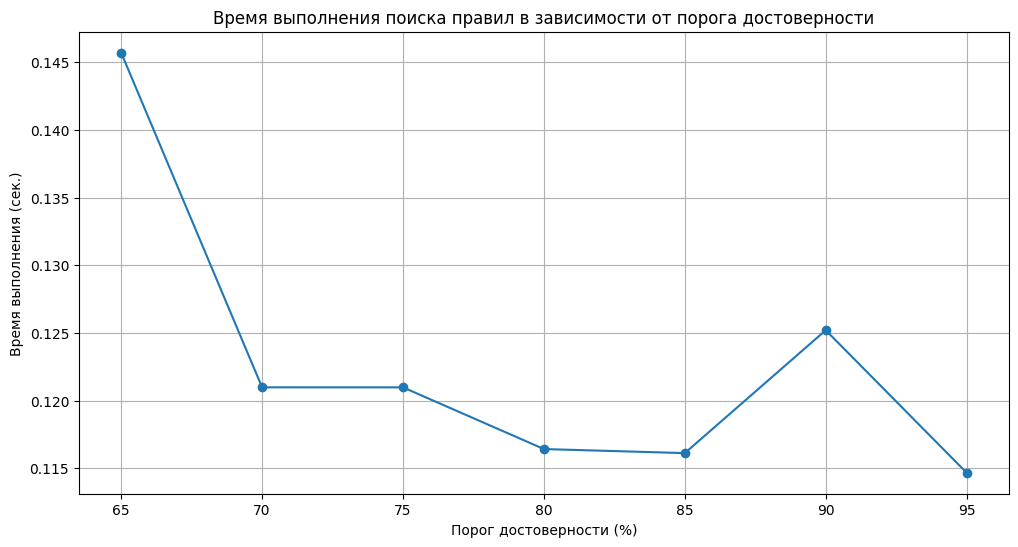

In [ ]:
# Визуализация времени выполнения поиска правил в зависимости от порога достоверности
plt.figure(figsize=(12, 6))
plt.plot(confidence_thresholds, execution_times, marker='o')
plt.title("Время выполнения поиска правил в зависимости от порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Время выполнения (сек.)")
plt.grid(True)
plt.show()

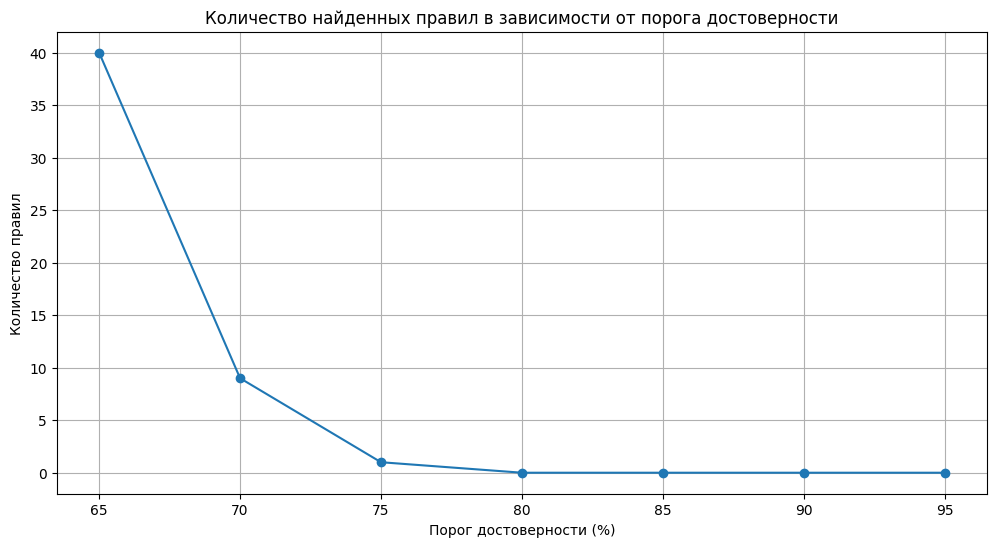

In [ ]:
# Визуализация количества найденных правил в зависимости от порога достоверности
plt.figure(figsize=(12, 6))
plt.plot(confidence_thresholds, rule_counts, marker='o')
plt.title("Количество найденных правил в зависимости от порога достоверности")
plt.xlabel("Порог достоверности (%)")
plt.ylabel("Количество правил")
plt.grid(True)
plt.show()

In [ ]:
# Подготовка результатов в удобочитаемом виде
for idx, rules in enumerate(rules_by_confidence):
    print(f"\nПравила для порога достоверности {confidence_thresholds[idx]}%:")
    for _, rule in rules.iterrows():
        antecedent = ', '.join(list(rule['antecedents']))
        consequent = ', '.join(list(rule['consequents']))
        support = rule['support']
        confidence = rule['confidence']
        print(f"{antecedent} → {consequent} | Поддержка: {support:.4f}, Достоверность: {confidence:.4f}")


Правила для порога достоверности 65%:
������� ����, ������������ ����� → �������� | Поддержка: 0.0268, Достоверность: 0.7077
����������� ����, ������, ������������ ����� → �������� | Поддержка: 0.0241, Достоверность: 0.6654
����, ������, ������������ ����� → �������� | Поддержка: 0.0211, Достоверность: 0.6639
����, ��������� ����� → �������� | Поддержка: 0.0200, Достоверность: 0.6696
��������� �����, ������������ ����� → �������� | Поддержка: 0.0189, Достоверность: 0.6827
����������� ����, ����, ������������ ����� → �������� | Поддержка: 0.0187, Достоверность: 0.6667
���, ������������ �����, ������� → �������� | Поддержка: 0.0184, Достоверность: 0.6509
����������� ����, ���, ������������ ����� → �������� | Поддержка: 0.0167, Достоверность: 0.6614
����������� ����, ������, ������� ���� → �������� | Поддержка: 0.0165, Достоверность: 0.6667
������, ��������, ��������� → ������� | Поддержка: 0.0148, Достоверность: 0.6894
������, ���������, ������� → �������� | Поддержка: 0.0148, Достоверн